# Data pretrain

In [4]:
!mkdir pt_data
!mkdir pt_data/images
!mkdir pt_data/json

In [2]:
pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.1/542.1 kB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.0/172.0 kB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 36.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 29.7 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.6.0
    Uninstalling fsspec-2024.6.0:
      Successfully uninstalled fsspec-2024.6.0
Note: you may need to restart the kernel to use updated packages.


In [1]:
import json
from datasets import load_dataset
data = load_dataset("5CD-AI/Vietnamese-liuhaotian-LLaVA-Pretrain-gg-translated")

In [2]:
# import glob
# coco_images = glob.glob("pt_data/images/*/*.jpg")
# coco_images = [path_.split("/")[-1] for path_ in coco_images]
# coco_images = set(coco_images)
# len(coco_images)

In [3]:
json_data = []

In [4]:
for i, row in enumerate(data["train"]):
    json_data.append({
      "id": row["id"],
      "image": row["image"],
      "conversations": row["conversations_vi"]
    })
    # if i >= 10000:
    #     break

In [5]:
json_data[0]

{'id': '003060223',
 'image': '00306/003060223.jpg',
 'conversations': [{'from': 'human',
   'value': '<image>\nTrình bày mô tả ngắn gọn về các đặc điểm chính của ảnh.'},
  {'from': 'gpt', 'value': 'gót ren lồng'}]}

In [6]:
# import json
# with open('/MoE-LLaVA/pt_data/json/pt_moe_llava.json', 'w', encoding='utf-8') as f:
#     json.dump(json_data, f, ensure_ascii=False, indent=4)

In [6]:
import json

In [7]:
with open("laion.json") as f:
    laion = json.load(f)

In [8]:
import json
with open('/MoE-LLaVA/pt_data/json/pt.json', 'w', encoding='utf-8') as f:
    json.dump(laion+json_data, f, ensure_ascii=False, indent=4)

In [12]:
import glob, shutil

for i in glob.glob('laion_pretrain/*.jpg'):
  shutil.move(i, 'pt_data/images/' + i.split("/")[-1])

In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = ""

In [2]:
from transformers import AutoModelForCausalLM, AutoTokenizer

model = AutoModelForCausalLM.from_pretrained(
    "sail/Sailor-0.5B",
    torch_dtype="auto",
)
tokenizer = AutoTokenizer.from_pretrained("sail/Sailor-0.5B")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/bitsandbytes/cextension.py:34: UserWarning: The installed version of bitsandbytes was compiled without GPU support. 8-bit optimizers, 8-bit multiplication, and GPU quantization are unavailable.
  warn("The installed version of bitsandbytes was compiled without GPU support. "


/opt/conda/lib/python3.10/site-packages/bitsandbytes/libbitsandbytes_cpu.so: undefined symbol: cadam32bit_grad_fp32
[2024-06-13 08:28:54,006] [INFO] [real_accelerator.py:110:get_accelerator] Setting ds_accelerator to cuda (auto detect)


/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


model.safetensors:   0%|          | 0.00/1.24G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/138 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.16k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.03M [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
model.save_pretrained("Qwen1.5-0.5B-sailor")

In [ ]:
tokenizer.save_pretrained("Qwen1.5-0.5B-sailor")

In [1]:
import json

In [2]:
from datasets import load_dataset

In [3]:
data = load_dataset("5CD-AI/Vietnamese-liuhaotian-LLaVA-Pretrain-gg-translated")

In [9]:
import glob
coco_images = glob.glob("pt_data/images/*/*.jpg")
coco_images = [path_.split("/")[-1] for path_ in coco_images]
coco_images = set(coco_images)
len(coco_images)

558128

In [11]:
json_data = []

In [12]:
for row in data["train"]:
    json_data.append({
      "id": row["id"],
      "image": row["image"],
      "conversations": row["conversations_vi"]
    })
    json_data.append({
      "id": row["id"]+"_",
      "image": row["image"],
      "conversations": row["conversations_zh"]
    })

In [13]:
len(json_data)

1116256

In [14]:
json_data[20]

{'id': '002733327',
 'image': '00273/002733327.jpg',
 'conversations': [{'from': 'human',
   'value': 'Mô tả hình ảnh một cách ngắn gọn.\n<image>'},
  {'from': 'gpt', 'value': 'bộ ba chốt con cú'}]}

In [15]:
import json
with open('/home/administrator/aiteam/khang/MoE-LLaVA/pt_data/json/pt_moe_llava.json', 'w', encoding='utf-8') as f:
    json.dump(json_data, f, ensure_ascii=False, indent=4)

# Data finetune

In [3]:
from datasets import load_dataset

In [4]:
vi_llava_conversation = load_dataset("Vi-VLM/Vista", name="vi_llava_conversation", split="train")
vi_sharegpt4v = load_dataset("Vi-VLM/Vista", name="vi_sharegpt4v", split="train")
vi_llava_complex_reasoning = load_dataset("Vi-VLM/Vista", name="vi_llava_complex_reasoning", split="train")
vi_llava_detail_description = load_dataset("Vi-VLM/Vista", name="vi_llava_detail_description", split="train")

In [5]:
vi_llava_conversation = vi_llava_conversation.to_list()
vi_sharegpt4v = vi_sharegpt4v.to_list()
vi_llava_complex_reasoning = vi_llava_complex_reasoning.to_list()
vi_llava_detail_description = vi_llava_detail_description.to_list()

In [9]:
import glob
coco_images = glob.glob("ft_data/images/*.jpg")
coco_images = [path_.split("/")[-1] for path_ in coco_images]
coco_images = set(coco_images)
len(coco_images)

15090

In [12]:
json_data = []
count = 0

In [13]:
for row in vi_sharegpt4v:
    if row["image"].split("/")[-1] in coco_images:
        new_conversations = []
        for i, line in enumerate(row["vi_conversations"]):
            if i % 2 == 0 :
                from_ = "human"
            else:
                from_ = "gpt"
            new_conversations.append({
                'from' : from_ , 
                'value' : line["value"]
            })
        json_data.append({
          "id": count,
          "image": row["image"].split("/")[-1],
          "conversations": new_conversations
        })
        count += 1
len(json_data)

28947

In [16]:
json_data[0]

{'id': 0,
 'image': '000114241.jpg',
 'conversations': [{'from': 'human',
   'value': '<image>\nBạn có thể giải thích thêm về các yếu tố của bức ảnh được cung cấp không?'},
  {'from': 'gpt',
   'value': 'Hình ảnh có một logo ấn tượng cho một công ty có tên "Machine No Guns". Logo được đặt trên một hình vuông màu đen, tạo nên sự tương phản mạnh mẽ thu hút sự chú ý vào các yếu tố bên trong. Chiếm giữ trung tâm của logo là tên công ty, "Machine No Guns", được viết bằng phông chữ không chân, in đậm. Văn bản chủ yếu có màu trắng, nhưng chữ "M" trong "Machine" và chữ "G" trong "Guns" được tô sáng bằng màu cam rực rỡ.\n\nChữ "M" được thay thế sáng tạo bằng hình minh họa màu cam của một khẩu súng máy, thể hiện tên công ty theo cách hấp dẫn về mặt hình ảnh. Trên khẩu súng máy này, có một biểu tượng "không" màu đỏ, nhấn mạnh thêm phần "No Guns" trong tên công ty.\n\nBên dưới văn bản chính, bằng phông chữ màu trắng nhỏ hơn và tinh tế hơn, dòng chữ "Garments and Goods" được ghi, cho biết loại sản 

In [15]:
import glob
coco_images = glob.glob("ft_data/images/train2017/*.jpg")
coco_images = [path_.split("/")[-1] for path_ in coco_images]
coco_images = set(coco_images)
len(coco_images)

118287

In [17]:
for row in vi_llava_conversation:
    if row["file_name"].split("/")[-1] in coco_images:
        new_conversations = []
        for i, line in enumerate(row["conversation"]):
            if i % 2 == 0 :
                from_ = "human"
            else:
                from_ = "gpt"
            new_conversations.append({
                'from' : from_ , 
                'value' : line["content"]
            })
        json_data.append({
          "id": count,
          "image": "train2017/"+row["file_name"],
          "conversations": new_conversations
        })
        count += 1
len(json_data)

135999

In [18]:
json_data[-1]

{'id': 135998,
 'image': 'train2017/000000242558.jpg',
 'conversations': [{'from': 'human',
   'value': 'Biển báo đường bằng gỗ bên cạnh biển báo lớn hơn có nội dung gì?'},
  {'from': 'gpt', 'value': 'Biển báo đường bằng gỗ có nội dung "Crook ST."'},
  {'from': 'human',
   'value': 'Biển báo lớn hơn bên cạnh biển báo đường bằng gỗ hiển thị hình ảnh gì?'},
  {'from': 'gpt',
   'value': 'Biển báo lớn hơn bên cạnh biển báo đường bằng gỗ hiển thị hình ảnh của một người đàn ông cơ bắp.'},
  {'from': 'human',
   'value': 'Hai biển báo được liên kết với nhau bằng cách nào?'},
  {'from': 'gpt',
   'value': 'Hai biển báo được liên kết với nhau bằng một sợi xích.'},
  {'from': 'human', 'value': 'Trên biển báo lớn hơn có chữ viết nào không?'},
  {'from': 'gpt', 'value': 'Trên biển báo lớn hơn không có chữ viết nào.'},
  {'from': 'human', 'value': 'Hai dấu hiệu được đặt trên bề mặt nào?'},
  {'from': 'gpt', 'value': 'Hai dấu hiệu được đặt trên cỏ.'},
  {'from': 'human',
   'value': 'Bạn có thể suy

In [19]:
for row in vi_llava_complex_reasoning:
    if row["file_name"].split("/")[-1] in coco_images:
        new_conversations = []
        for i, line in enumerate(row["conversation"]):
            if i % 2 == 0 :
                from_ = "human"
            else:
                from_ = "gpt"
            new_conversations.append({
                'from' : from_ , 
                'value' : line["content"]
            })
        json_data.append({
          "id": count,
          "image": "train2017/"+row["file_name"],
          "conversations": new_conversations
        })
        count += 1
len(json_data)

248649

In [20]:
for row in vi_llava_detail_description:
    if row["file_name"].split("/")[-1] in coco_images:
        new_conversations = []
        for i, line in enumerate(row["conversation"]):
            if i % 2 == 0 :
                from_ = "human"
            else:
                from_ = "gpt"
            new_conversations.append({
                'from' : from_ , 
                'value' : line["content"]
            })
        json_data.append({
          "id": count,
          "image": "train2017/"+row["file_name"],
          "conversations": new_conversations
        })
        count += 1
len(json_data)

359802

In [21]:
json_data_cleaned = []

In [22]:
for row in json_data:
    if len(row["conversations"]) >= 2:
        json_data_cleaned.append(row)

In [23]:
len(json_data_cleaned)

359662

In [24]:
import json
with open('/home/administrator/aiteam/khang/MoE-LLaVA/ft_data/json/ft_moe_llava.json', 'w', encoding='utf-8') as f:
    json.dump(json_data_cleaned, f, ensure_ascii=False, indent=4)

# Test

In [17]:
!nvidia-smi

Thu Jun 13 15:40:01 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 515.65.01    Driver Version: 515.65.01    CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:02:00.0 Off |                  N/A |
|  0%   41C    P8    19W / 420W |     37MiB / 24576MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA GeForce ...  On   | 00000000:03:00.0 Off |                  N/A |
|  0%   

In [1]:
import os 
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [2]:
import torch
from PIL import Image
from moellava.constants import IMAGE_TOKEN_INDEX, DEFAULT_IMAGE_TOKEN
from moellava.conversation import conv_templates, SeparatorStyle
from moellava.model.builder import load_pretrained_model
from moellava.utils import disable_torch_init
from moellava.mm_utils import tokenizer_image_token, get_model_name_from_path, KeywordsStoppingCriteria

[2024-06-13 15:42:21,650] [INFO] [real_accelerator.py:110:get_accelerator] Setting ds_accelerator to cuda (auto detect)


In [3]:
disable_torch_init()

In [4]:
!ls ./checkpoints/llavaqwen-1.8b-finetune-moe/checkpoint-4000/

added_tokens.json	model.safetensors	 trainer_state.json
config.json		rng_state_0.pth		 training_args.bin
generation_config.json	rng_state_1.pth		 vocab.json
global_step4000		scheduler.pt		 zero_to_fp32.py
latest			special_tokens_map.json
merges.txt		tokenizer_config.json


In [5]:
model_path = './checkpoints/llavaqwen-1.8b-finetune-moe-1.5/checkpoint-4000'  # LanguageBind/MoE-LLaVA-Qwen-1.8B-4e or LanguageBind/MoE-LLaVA-StableLM-1.6B-4e
device = 'cuda'
load_4bit, load_8bit = False, False  # FIXME: Deepspeed support 4bit or 8bit?
model_name = get_model_name_from_path(model_path)
tokenizer, model, processor, context_len = load_pretrained_model(model_path, None, model_name, load_8bit, load_4bit, device=device)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


[2024-06-13 15:42:23,947] [INFO] [logging.py:96:log_dist] [Rank -1] Creating MoE layer with num_experts: 4 | num_local_experts: 4 | expert_parallel_size: 1
[2024-06-13 15:42:23,956] [INFO] [logging.py:96:log_dist] [Rank -1] Creating MoE layer with num_experts: 4 | num_local_experts: 4 | expert_parallel_size: 1
[2024-06-13 15:42:23,961] [INFO] [logging.py:96:log_dist] [Rank -1] Creating MoE layer with num_experts: 4 | num_local_experts: 4 | expert_parallel_size: 1
[2024-06-13 15:42:23,965] [INFO] [logging.py:96:log_dist] [Rank -1] Creating MoE layer with num_experts: 4 | num_local_experts: 4 | expert_parallel_size: 1
[2024-06-13 15:42:23,970] [INFO] [logging.py:96:log_dist] [Rank -1] Creating MoE layer with num_experts: 4 | num_local_experts: 4 | expert_parallel_size: 1
[2024-06-13 15:42:23,974] [INFO] [logging.py:96:log_dist] [Rank -1] Creating MoE layer with num_experts: 4 | num_local_experts: 4 | expert_parallel_size: 1
[2024-06-13 15:42:23,979] [INFO] [logging.py:96:log_dist] [Rank 

/opt/conda/lib/python3.10/site-packages/torch/_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [6]:
import glob
import matplotlib.pyplot as plt

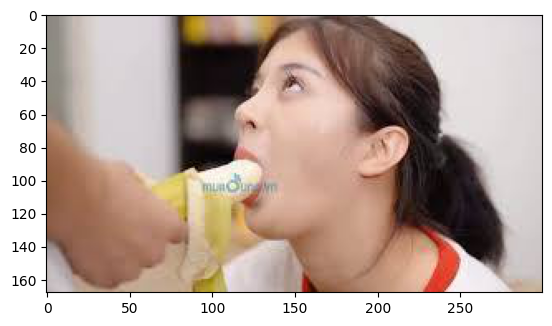

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


USER: Bạn có thể mô tả bức tranh này không?
Bức tranh này cho thấy một người phụ nữ trẻ đang đánh răng. Cô ấy có mái tóc dài màu nâu và đôi mắt nâu. Cô ấy đang đánh răng bằng bàn chải đánh răng màu xanh lam và trắng. Cô ấy đang nhìn vào gương và có vẻ như đang tập trung vào việc đánh răng. Bức tranh được vẽ theo phong cách hoạt hình và có màu sắc tươi sáng.


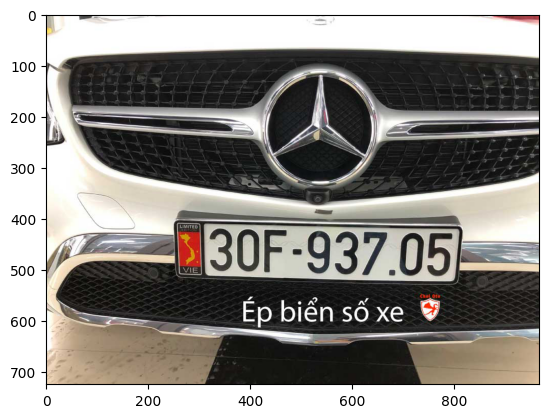

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


USER: Bạn có thể mô tả bức tranh này không?
Bức tranh này là một tấm biển hiệu của một chiếc xe hơi Mercedes-Benz. Tấm biển hiệu có nền màu trắng với logo Mercedes-Benz màu đen ở giữa. Logo Mercedes-Benz là một hình tròn màu đỏ với dòng chữ "Mercedes-Benz" màu đen bên trong. Bên dưới logo Mercedes-Benz là dòng chữ "300 Series" màu đen. Bên dưới dòng chữ "300 Series" là dòng chữ "400 Series" màu đen. Bên dưới dòng chữ "400 Series" là dòng chữ "420 Series" màu đen. Bên dưới dòng chữ "420 Series


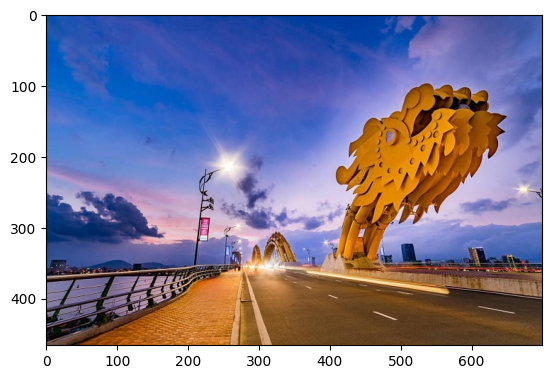

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


USER: Bạn có thể mô tả bức tranh này không?
Bức tranh mô tả một con sư tử đang đứng trên một cây cầu bắc qua một con sông. Con sư tử được sơn màu vàng và có bờm dài. Nó đang nhìn về phía trước với vẻ mặt dữ tợn. Phía sau con sư tử là một thành phố với những tòa nhà cao tầng. Bầu trời trong xanh và có một vài đám mây.


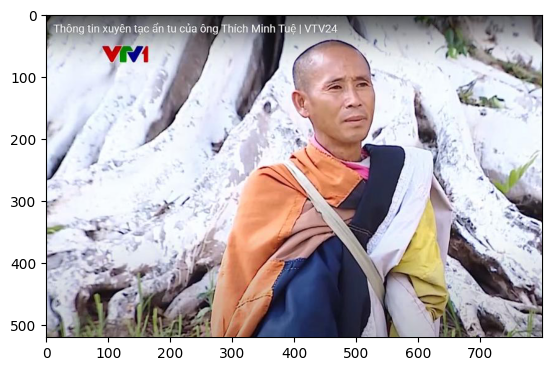

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


USER: Bạn có thể mô tả bức tranh này không?
Bức tranh này có một người đàn ông đang ngồi trên một tảng đá. Người đàn ông mặc một chiếc áo sơ mi dài tay màu xanh lam và một chiếc khăn quàng cổ màu vàng. Anh ta có mái tóc đen và đôi mắt đen. Anh ta đang nhìn về phía trước với vẻ mặt buồn. Bức tranh được vẽ theo phong cách hiện thực.


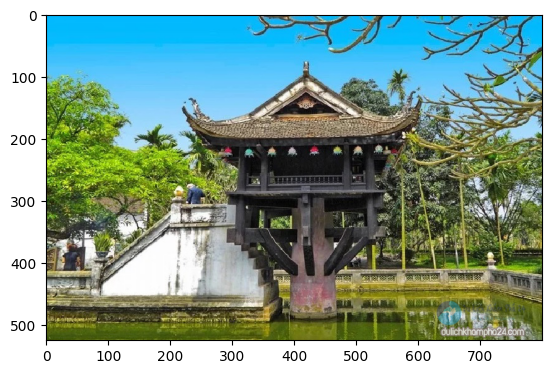

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


USER: Bạn có thể mô tả bức tranh này không?
Bức tranh vẽ một ngôi đền cổ kính nằm giữa một khu rừng nhiệt đới tươi tốt. Ngôi đền có mái ngói cong và các bức tường được trang trí bằng những bức tranh chạm khắc tinh xảo. Phía trước ngôi đền có một hồ nước lớn, phản chiếu hình ảnh của ngôi đền và những cây xanh xung quanh. Bầu trời trong xanh và có một vài đám mây trắng.


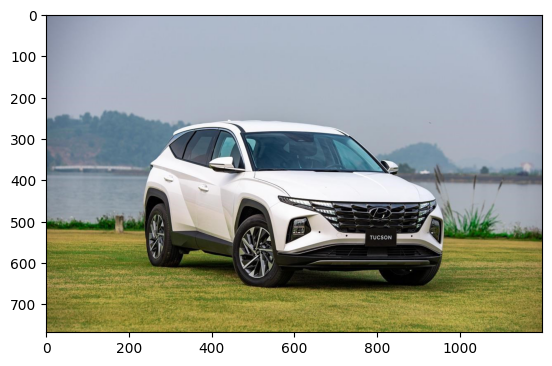

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


USER: Bạn có thể mô tả bức tranh này không?
Bức tranh này là một bức ảnh chụp một chiếc xe hơi màu trắng đỗ trên bãi cỏ xanh. Chiếc xe có kiểu dáng đẹp và hiện đại, với lưới tản nhiệt màu đen và đèn pha tròn. Nội thất của chiếc xe có màu đen, với ghế ngồi bọc da và vô lăng màu đen. Chiếc xe đang đỗ ở một nơi có nhiều cây xanh, với một hồ nước ở phía xa. Bầu trời trong xanh và có một vài đám mây.


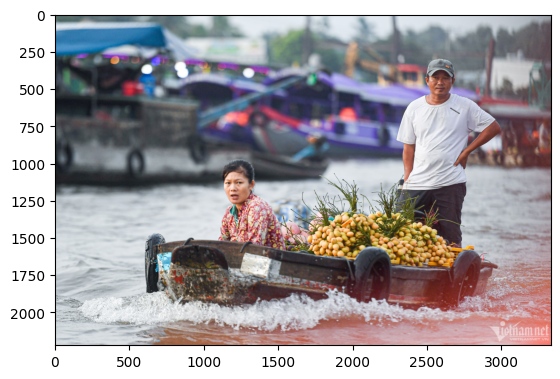

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


USER: Bạn có thể mô tả bức tranh này không?
Bức tranh này có một người đàn ông và một người phụ nữ đang chèo thuyền trên một con sông. Người đàn ông mặc áo sơ mi trắng và quần dài đen, còn người phụ nữ mặc áo sơ mi xanh và quần dài đen. Họ đang chèo thuyền trên một chiếc thuyền nhỏ, chở đầy những quả chuối chín vàng. Người đàn ông đang cầm một quả chuối trên tay, còn người phụ nữ đang cầm một quả chuối trên tay kia. Họ đang chèo thuyền trên một con sông, xung quanh là những cây xanh và những ngôi


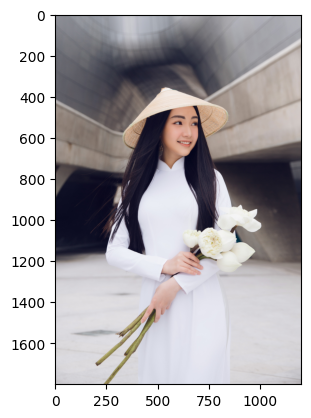

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


USER: Bạn có thể mô tả bức tranh này không?
Bức tranh này có một người phụ nữ trẻ với mái tóc dài màu nâu được búi cao trên đầu. Cô ấy đang mặc một chiếc váy màu trắng và một chiếc áo khoác màu xanh lá cây. Cô ấy đang cầm một bó hoa màu trắng trên tay. Phía sau cô ấy là một bức tường màu xám.


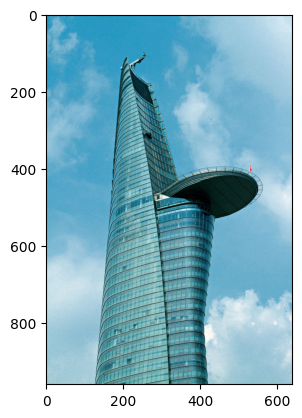

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


USER: Bạn có thể mô tả bức tranh này không?
Bức tranh cho thấy một tòa nhà chọc trời bằng kính và thép cao chót vót, được bao quanh bởi bầu trời xanh và những đám mây trắng. Tòa nhà có hình dạng giống như một khối hộp chữ nhật, với các cạnh thẳng đứng và đỉnh nhọn. Nó được chiếu sáng bởi ánh sáng mặt trời, tạo nên hiệu ứng lấp lánh. Bầu trời trong xanh và những đám mây trắng tạo nên một phông nền hoàn hảo cho tòa nhà.


In [10]:
for image_path in glob.glob("test_images/*"):
    inp = 'Bạn có thể mô tả bức tranh này không?'
    image = image_path
    image_processor = processor['image']
    conv_mode = "qwen"  # qwen or stablelm
    conv = conv_templates[conv_mode].copy()
    roles = conv.roles
    image_tensor = image_processor.preprocess(Image.open(image).convert('RGB'), return_tensors='pt')['pixel_values'].to(model.device, dtype=torch.float16)
    plt.imshow(Image.open(image).convert('RGB'))
    plt.show()
    print(f"{roles[0]}: {inp}")
    # inp = DEFAULT_IMAGE_TOKEN + '\n' + inp
    inp = inp + "\n" + DEFAULT_IMAGE_TOKEN 
    conv.append_message(conv.roles[0], inp)
    conv.append_message(conv.roles[1], None)
    prompt = conv.get_prompt()
    input_ids = tokenizer_image_token(prompt, tokenizer, IMAGE_TOKEN_INDEX, return_tensors='pt').unsqueeze(0).cuda()
    stop_str = conv.sep if conv.sep_style != SeparatorStyle.TWO else conv.sep2
    keywords = [stop_str]
    stopping_criteria = KeywordsStoppingCriteria(keywords, tokenizer, input_ids)
    with torch.inference_mode():
        output_ids = model.generate(
        input_ids,
        images=image_tensor,
        do_sample=True,
        temperature=0.1,
        max_new_tokens=128,
        num_beams=4,
        use_cache=True,
        stopping_criteria=[stopping_criteria])

    outputs = tokenizer.decode(output_ids[0, input_ids.shape[1]:], skip_special_tokens=True).strip()
    print(outputs)
    print("="*100)

In [11]:
import deepspeed
deepspeed.__version__

'0.9.5'

In [14]:
from deepspeed.accelerator import get_accelerator

In [15]:
get_accelerator().communication_backend_name()

'nccl'